
Вы будете работать с набором данных IMDB: множеством из 50 000 самых
разных отзывов к кинолентам в интернет-базе фильмов (Internet Movie Database).
Набор разбит на 25 000 обучающих и 25 000 контрольных отзывов, каждый набор на
50 % состоит из отрицательных и на 50 % из положительных отзывов.


УСТАНОВКА МОДУЛЕЙ

In [1]:
from keras.datasets import imdb
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

ЗАГРУЗКА ДАННЫХ

In [2]:
# загружаем данные (предобработанные)
# num_words=10000 означает, что будет встречаться только 10к самых популярных слов, а
# редкие будут отброшены
# train_data и test_data — это списки отзывов;
# каждый отзыв — это список индексов слов (кодированное представление последовательности слов).
# train_labels и test_labels — это списки нулей и единиц, где нули соответствуют отрицательным
# отзывам, а единицы — положительным
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("[INFO] RAW DATA IS:")
print(f"train_data: \n{train_data}")
print(f"\ntest_data: \n{test_data}")
print(f"\ntrain_labels: \n{train_labels}")
print(f"\ntest_labels: \n{test_labels}")

17465344/17464789 [==============================] - 0s 0us/step
[INFO] RAW DATA IS:
train_data: 
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 447

ВЕКТОРИЗАЦИЯ ДАННЫХ

In [3]:
# данные необходимо преобразовать в бинарную матрицу
# то есть например если есть массив [3,5], то он превратиться в вектор формы (n, 10 000), где
# все числа, кроме тех, которые на 3 и 5 позициях, будут нулями, а те - единицами.
def vectorize_sequences(sequences,dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# векторизуем метки
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
print("\n\n[INFO] PREPROCESSED DATA IS:")
print(f"train_data: \n{x_test}")
print(f"\ntest_data: \n{x_test}")
print(f"\ntrain_labels: \n{y_train}")
print(f"\ntest_labels: \n{y_test}")




[INFO] PREPROCESSED DATA IS:
train_data: 
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

test_data: 
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

train_labels: 
[1. 0. 0. ... 0. 1. 0.]

test_labels: 
[0. 1. 1. ... 0. 0. 0.]


СОЗДАНИЕ МОДЕЛИ СЕТИ

In [5]:
# теперь создаем саму сеть
# пока что я не знаю сколько слоев использовать и сколько нейронов использовать в каждом слое
# это будет разбираться позднее
# сейчас создаю три слоя: 16 16 и 1 нейрон
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10_000, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # эта функция активации возвращает вероятность (от 0 до 1)

КОМПИЛЯЦИЯ МОДЕЛИ

In [6]:
# модель настраивается с помощью оптимизатора rmsprop
# мы реалищуем бинарную классификацию, так что используем соответствующую функцию потерь loss
# компилируем модель
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

ОБУЧЕНИЕ И ПРОВЕРКА ВО ВРЕМЯ ОБУЧЕНИЯ

In [7]:
# во время тренировки можно проверять точность модели на отдельной части тренировочных данных
# разделим тренировочные данные пополам
# данные для тренировки
partial_x_train = x_train[10_000:]
partial_y_train = y_train[10_000:]
# данные для проверки прямо во время тренировки
check_x_train = x_train[:10_000]
check_y_train = y_train[:10_000]

# возвращается history - объект, у которого есть поле - словарь .history, содержащий всю инфу
history = model.fit(partial_x_train, partial_y_train, validation_data=(check_x_train, check_y_train), epochs=20, batch_size=512)

history = history.history

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4991 - accuracy: 0.7977 - val_loss: 0.3836 - val_accuracy: 0.8654
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3017 - accuracy: 0.9057 - val_loss: 0.3093 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2221 - accuracy: 0.9303 - val_loss: 0.2777 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1765 - accuracy: 0.9431 - val_loss: 0.2727 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1429 - accuracy: 0.9556 - val_loss: 0.2828 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1179 - accuracy: 0.9625 - val_loss: 0.3326 - val_accuracy: 0.8733
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0959 - accuracy: 0.9725 - val_loss: 0.3098 - val_accuracy: 0.8833
Epoch 8/20
30

ГРАФИКИ ПО ДАННЫМ ТРЕНИРОВКИ

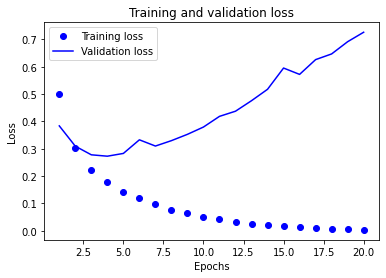

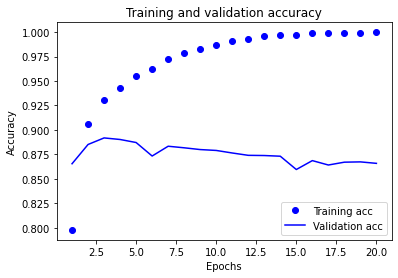

In [8]:
# функция строит графики после тренировки
def draw_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['accuracy']) + 1)

    #               ГРАФИКИ ПОТЕРЬ
    # синими точками рисуется график потерь на этапе обучения
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    # синей линией рисуется график потерь на этапе проверки
    plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # очищаем рисунок
    plt.clf()

    #               ГРАФИКИ ТОЧНОСТИ
    acc_values = history['accuracy']
    validation_acc_values = history['val_accuracy']
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, validation_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



# рисуем все графики
draw_graph(history)

УМЕНЬШИМ КОЛИЧЕСТВО ЭПОХ ДО 4, ЧТОБЫ ИЗБЕЖАТЬ ПЕРЕОБУЧЕНИЯ

In [9]:
# уменьшим число эпох до 4
history = model.fit(partial_x_train, partial_y_train, validation_data=(check_x_train, check_y_train), epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
# получем точность примерно 85%
print(f"[INFO] EVALUATION RESULTS ARE: {results}")

Epoch 1/4
30/30 [==============================] - 1s 26ms/step - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.7577 - val_accuracy: 0.8672
Epoch 2/4
30/30 [==============================] - 1s 23ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.7952 - val_accuracy: 0.8641
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.8595 - val_accuracy: 0.8621
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.9552 - accuracy: 0.8479
[INFO] EVALUATION RESULTS ARE: [0.9552115797996521, 0.8478800058364868]


ДЕЛАЕМ ПРЕДСКАЗАНИЯ

In [10]:
predictions = model.predict(x_test)

print(f'\n[INFO] PREDICTIONS ARE: \n {predictions}')



[INFO] PREDICTIONS ARE: 
 [[1.2435317e-03]
 [1.0000000e+00]
 [9.6526915e-01]
 ...
 [1.7565489e-04]
 [3.9893687e-03]
 [7.9995608e-01]]
